<div class="alert alert-block alert-info">

#**CLASS 01 - PROGRAM GRAPHS**
**Learning Objectives:**
*   Building program graphs from Python programs
*   Automating program graph generation
*   Observation of basic program properties

</div>


## **PROGRAM GRAPHS**

A program graph is a graphical representation of the control structure of a program or system. A program graph is a directed graph so it has a set of nodes and a set of edges. However, there is a little more structure to a program graph. It has an initial node that intuitively represents the starting point of the executions modelled
by the program graph and by symmetry it has a final node that represents a point
where the execution will have terminated. Each of the edges is labelled with an
action modelling the computation to take place when control follows the edge. The
program graph does not specify the meaning of actions – so far they are just syntax
and it is only when we come to the semantics in the next section that we give 𝑞⊳ meaning to the actions.

The next figure shows a program graph with five nodes: 𝑞⊳ is the initial node, 𝑞▴ is the final node and then there are three additional nodes 𝑞1, 𝑞2 and 𝑞3. The edges are labelled with the associated actions; as an example the action 𝚢 ∶= 𝚡 ∗ 𝚢 is associated with the edge with source 𝑞2 and target 𝑞3. The five actions 𝚢 ∶= 𝟷, 𝚡 > 𝟶, 𝚡 ≤ 𝟶, 𝚢 ∶= 𝚡 ∗ 𝚢 and 𝚡 ∶= 𝚡 − 𝟷 have been chosen so as to be suggestive of the meaning that we will be giving them when we come to the semantics – it should be no surprise that the program graph is intended to compute the factorial function: upon termination of the program the variable y should hold the value of the factorial of the initial value of x.

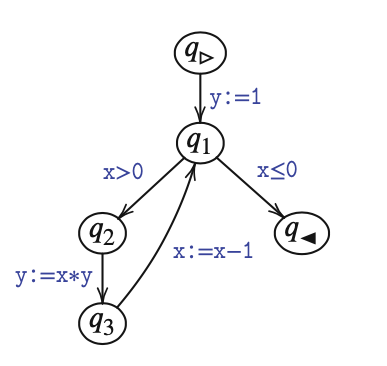




**Definition (PROGRAM GRAPH)**: A program graph PG consists of the following:

• Q: a finite set of nodes

• 𝑞⊳𝑞▴ ∈ Q: two nodes called the initial node and the final node, respectively

• Act: a set of actions

• E⊆Q×Act×Q: afinite set of edges

no edges with source 𝑞▴.

We sometimes write PG = (Q, 𝑞⊳𝑞▴, Act, E) to summarise the components of the program graph.



Returning to the program graph before, it can be represented by the three sets:



*   Q = {𝑞⊳, 𝑞1, 𝑞2, 𝑞3, 𝑞▴}
*   Act = {𝚢∶=𝟷,𝚡>𝟶,𝚡≤𝟶,𝚢∶=𝚡∗𝚢,𝚡∶=𝚡−𝟷}
*   E = {(𝑞⊳,𝚢 ∶= 𝟷,𝑞1),(𝑞1,𝚡 > 𝟶,𝑞2),(𝑞1,𝚡 ≤ 𝟶,𝑞▴), (𝑞2, 𝚢 ∶= 𝚡 ∗ 𝚢, 𝑞3), (𝑞3, 𝚡 ∶= 𝚡 − 𝟷, 𝑞1)}

where the first set lists the nodes, including the initial and final nodes, the second set lists the actions, and the third set lists the edges.

Program graphs are closely related to finite automata. Recall that a non-deterministic finite automaton is given by a set of states 𝑄 with one state 𝑞0 being the initial state and a subset 𝐹 of states being the final states; additionally, there is an alphabet Σ and a transition relation 𝛿, which, given a state and a symbol from the alphabet, specifies a set of states. The alphabet corresponds to the set of actions of the program graph (so we have Σ = Act) and the transition relation is nothing but an alternative representation of the edges of the program graph.

### **EXERCISE 1.**

Retrieve a Python program from this program graph:

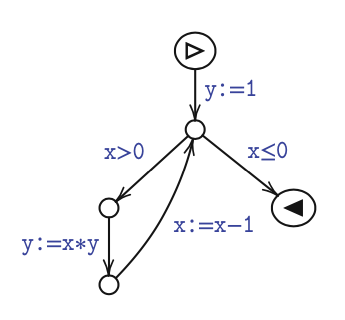

In [ ]:
# CALCULA O FATORIAL DE X
# {x=2} - Pré condição
y = 1
while x > 0:
  y = x * y
  x = x - 1
# {y=2} - Pós condição
# Vamos preencher o meio a partir da pré condição e pós condição.
#(Existem sistemas que calculam o (meio) código - SOZINHO)
# FOP - Feature Oriented Programmer

### **EXERCISE 2.**

Specify a program graph for the power function computing the power 2^n of a number 𝑛 ≥ 0: upon termination the variable y should hold the value of the n’th power of 2.

In [ ]:
#TYPE YOUR SOLUTION HERE
# Potencia de 2 do valor n.
# n = 0
p = 1
while n > 0:
  # p = p * 2 # Muitas movimentações de p,não é eficiente
  p*=2
  # p <<=1 Deslocamento para a esquerda,desloca 1 bit para a esquerda. (Multiplicar)
  # p >>=1 Deslocamento para a direita,desloca 1 bit para a direita. (Dividir)
  n = n - 1

# Certifique que p é igual a 1
# assert(p==1)

## **GENERATING PROGRAM GRAPHS WITH FLLOAT**

FLLOAT (From LTLf and LDLf tO Automata) is a Python library for translating Linear-time Temporal Logic (LTL) and Linear Dynamic Logic (LDL) formulas with finite-trace semantics to automata, so as to perform satisfiability and validity reasoning tasks in the finite-trace setting. The tool also allows for exporting automata in the graphviz format as well as providing the traditional automata operations through the jautomata library (determinization, intersection, negation, trimming and so on).

First of all, you have to install the library:

In [4]:
!pip install flloat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 5.3 MB/s eta 0:00:00


Then, you have to specify your program and visualize the related program graph:

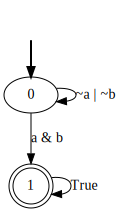

In [5]:
from flloat.parser.ltlf import LTLfParser

# parse the formula
parser = LTLfParser()
formula = "F (a & b)"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

So you can check assignments using both parsed formulas and automata:

In [ ]:
from pickle import TRUE
test = [{"a": True, "b": True}]
assert parsed_formula.truth(test)

In [ ]:
assert dfa.accepts(test)

In [ ]:
from pickle import TRUE
test = [{"a": True, "b": False}]
assert parsed_formula.truth(test)

AssertionError: 

In [ ]:
assert dfa.accepts(test)

### **EXERCISE 3.**

Consider the following statement: "**every man is intelligent**". Implement a fórmula for this and evaluate every possible test.

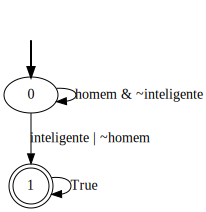

In [ ]:
#TYPE YOUR CODE HERE
parser = LTLfParser()
formula = "F (homem -> inteligente)"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [ ]:
test = [{"homem": False, "inteligente": False}]
assert dfa.accepts(test)

### **EXERCISE 4.**

Consider the following statement: "**every prime number is divisible by 1 and itself**". Implement a fórmula for this and evaluate every possible test.

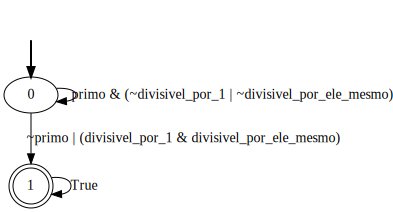

In [ ]:
#TYPE YOUR CODE HERE
parser = LTLfParser()
formula = "F (primo -> (divisivel_por_1 & divisivel_por_ele_mesmo))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph


### **EXERCISE 5.**

Consider the following statement: "**a natural number p is prime if and only if p is divisible by 1 and itself**". Implement a fórmula for this and evaluate every possible test.

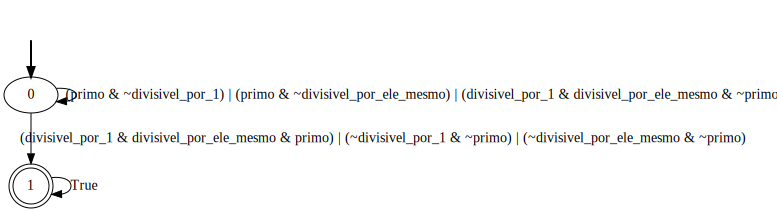

In [ ]:
#TYPE YOUR CODE HERE - SE (APENAS DA ESQUERDA PARA A DIREITA) - SE E SOMENTE SE (VAI NOS DOIS SENTIDOS)
parser = LTLfParser()
formula = "F (primo <-> (divisivel_por_1 & divisivel_por_ele_mesmo))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

### **HOMEWORK**

1.   Consider the following statement: "**if a man is intelligent and knows  a lot of things about Medicine then this man is a doctor**". Implement a fórmula for this and evaluate every possible test.

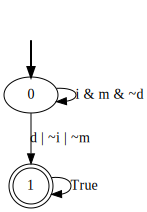

In [9]:
#TYPE YOUR IMPLEMENTATION HERE, generating a program graph g.

#i = man is intelligent
#m = knows a lot of things about Medicine
#d = man is a doctor

parser = LTLfParser()
formula = "F ((i & m) -> d)"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [15]:
#TEST YOUR IMPLEMENTATION HERE BEFORE SUBMITTING IT
test = [{"i": False, "m": False, "d": True}]
assert dfa.accepts(test)

2.   Consider the following statement: "**if the weather today is cloudy or windy, then tomorrow will rain or be cloudy**". Implement a fórmula for this and evaluate every possible test.

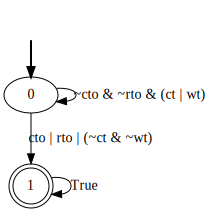

In [16]:
#TYPE YOUR IMPLEMENTATION HERE, generating a program graph g.

#ct = today is cloudy
#wt = today is windy
#rto = tomorrow will rain
#cto = tomorrow will be cloudy

parser = LTLfParser()
formula = "F ((ct | wt) -> (rto | cto))"
parsed_formula = parser(formula)
dfa = parsed_formula.to_automaton()
graph = dfa.to_graphviz()
graph

In [22]:
#TEST YOUR IMPLEMENTATION HERE BEFORE SUBMITTING IT
test = [{"ct": True, "wt": True, "rto": True, "cto": False}]
assert dfa.accepts(test)